# Introdução
Este trabalho é parte inicial do estudo de ferramentas de Data Science e utilizará o famoso conjunto de dados de passageiros do RMS Titanic publicado no Kaggle. É um clássico desafio para iniciantes como um “Hello World” de ciências de dados.

# Justificativa
Exatamente por ser um desafio para iniciantes é uma excelente forma de entender, comparar e praticar modelos de predição. 

# Objetivos

# Entender o problema e as possíveis soluções
O RMS Titanic era um navio de passageiros Britânico lançado ao mar em 1911 que naufragou em sua viagem inaugural em 1912. Este naufrágio é conhecido como um dos maiores desastres marítimos da história. 
Apesar de investigações demostrarem falhas de projeto que levaram ao desfecho trágico da viagem, nosso objetivo é utilizar este conjunto de dados para predizer se um passageiro sobreviveria ou não.  
Trata-se de um problema de classificação onde apenas dois resultados possíveis, não sobreviveu ou sobreviveu, respectivamente registradas no conjunto de dados como 0 e 1.  

* se 0 = Não Sobreviveu.
* se 1 = Sobreviveu

### Dicionário de dados:  

| Variável | Definição                         | Chave                                            |
|----------|-----------------------------------|--------------------------------------------------|
| survival | Surviveu                          | 0 = Não,   1 = Sim                               |
| pclass   | Classe                            | 1   = 1º, 2 = 2º, 3 = 3º                         |
| sex      | Sexo                              |                                                  |
| Age      | Idade   em anos                   |                                                  |
| sibsp    | qtd  de irmãos / cônjuges a bordo |                                                  |
| parch    | qtd   de pais / filhos a bordo    |                                                  |
| ticket   | Número do bilhete                 |                                                  |
| fare     | Tarifa de passageiro              |                                                  |
| cabin    | Número da cabine                  |                                                  |
| embarked | Porto de embarque                 | C   = Cherbourg, Q = Queenstown, S = Southampton |


# Obtenção dos dados  
Faremos download da famosa base de dados Titanic disponivel no Kaggle.  
informações de como fazer download no Jupter:   
    https://bit.ly/3yADZN8

In [3]:
# !kaggle competitions download -c titanic
# !unzip 'titanic.zip'

import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [5]:
import numpy as np
import pandas as pd

# visualizações
import matplotlib.pyplot as plt
import seaborn as sns

## Comando mágicos 
# para não precisar colocar plt.show()
%matplotlib inline

#para inprimir várias linhas na mesma célula
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

print('Importações completas!')

Importações completas!


In [6]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Análise exploratória

### Analizando o df_train  

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Run this cell to render a mitosheet
# See mito's documentation here: https://docs.trymito.io/how-to/creating-a-mitosheet
# Join our Discord for support here: https://discord.gg/XdJSZyejJU

import mitosheet
mitosheet.sheet(df_train)

MitoWidget(analysis_data_json='{"analysisName": "UUID-ff43b0c1-3eb2-4e9d-8683-92a600953932", "code": {"imports…

In [ ]:
from mitosheet import *; register_analysis('UUID-ff43b0c1-3eb2-4e9d-8683-92a600953932')

# Drop duplicates in df_train
df_train = df_train.drop_duplicates(keep='first')

# Renamed PassengerId to Passengeiro_id in df_train
df_train.rename(columns={'PassengerId': 'Passengeiro_id'}, inplace=True)

# Renamed Survived to sobreviveu in df_train
df_train.rename(columns={'Survived': 'sobreviveu'}, inplace=True)

# Filtered Age in df_train
df_train = df_train[df_train['Age'].notnull()]



In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Qual é a distribuição dos sobreviventes?

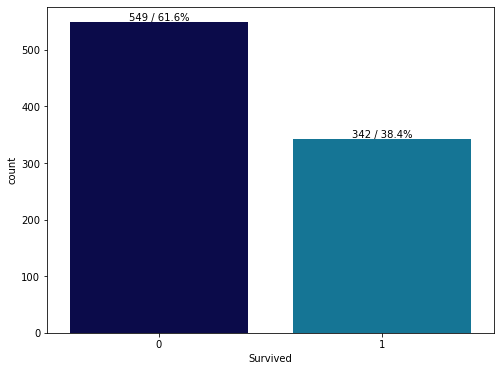

In [6]:
plt.figure(figsize=(8,6))
ax = sns.countplot( data=df_train, x='Survived', palette='ocean')
total = float(len(df_train))
for p in ax.patches:
    valores = "{0} / {1:.1f}%".format(p.get_height(),100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 3
    ax.annotate(valores, (x, y),ha='center')
plt.show()

####  Qual a distribuição de sobreviventes por sexo?

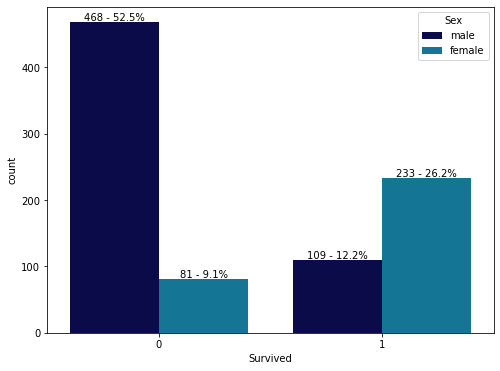

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


In [7]:
plt.figure(figsize=(8,6))
ax = sns.countplot( data=df_train, x='Survived', hue='Sex', palette='ocean')
total = float(len(df_train))
for p in ax.patches:
    valores = "{0} - {1:.1f}%".format(p.get_height(),100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 3
    ax.annotate(valores, (x, y),ha='center')
plt.show()
pd.crosstab( df_train['Survived'],df_train['Sex'], normalize=False, margins=True, margins_name='Total')

#### Daqueles que sobreviveram?

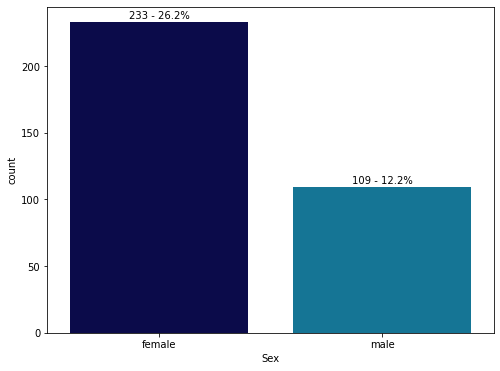

In [8]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_train[df_train["Survived"] == 1],x="Sex", palette='ocean')
total = float(len(df_train))
for p in ax.patches:
    valores = "{0} - {1:.1f}%".format(p.get_height(),100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 3
    ax.annotate(valores, (x, y),ha='center')
plt.show()

#### E dos que não sobreviveram?

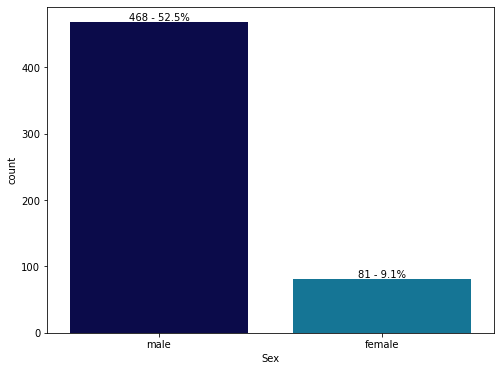

In [9]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_train[df_train["Survived"] == 0],x="Sex", palette='ocean')
total = float(len(df_train))
for p in ax.patches:
    valores = "{0} - {1:.1f}%".format(p.get_height(),100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 3
    ax.annotate(valores, (x, y),ha='center')
plt.show()

#### E a distribuição de sobreviventes por Classe?

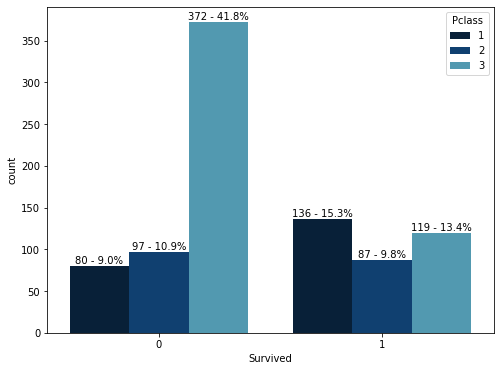

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot( data=df_train, x='Survived', hue='Pclass', palette='ocean')
total = float(len(df_train))
for p in ax.patches:
    valores = "{0} - {1:.1f}%".format(p.get_height(),100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 3
    ax.annotate(valores, (x, y),ha='center')
plt.show()
pd.crosstab( df_train['Survived'],df_train['Pclass'], normalize=False, margins=True, margins_name='Total')

No kaggle este Data Frame ja está dividido em "train" e "test" para facilitar o tratamento dos dados vamos unir os dois!  
Mais adiante poderemso dividir novamente apenas filtrando a coluna "Passengerid" igual a NaN.

In [11]:
df = df_train.append(df_test, sort=False)

Text(0.5, 0.98, 'Dados Nulos.')

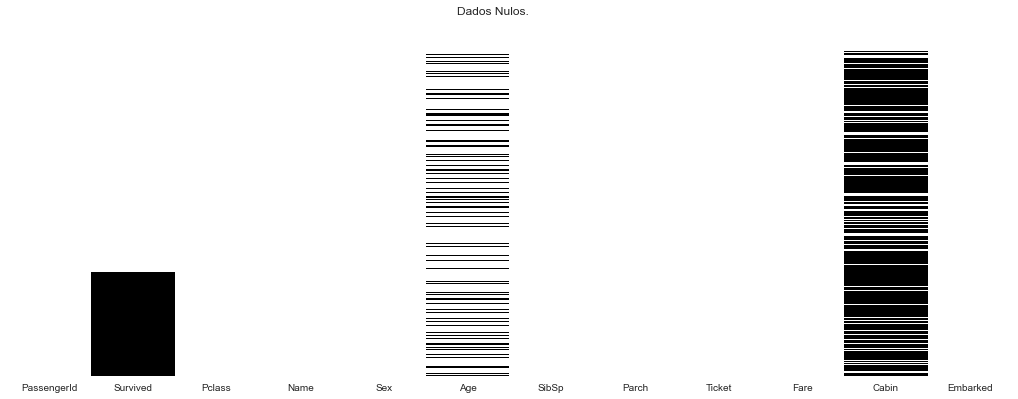

In [12]:
plt.figure(figsize=(18,6))
sns.set_style('darkgrid')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='binary')
plt.suptitle("Dados Nulos.") 

É esperado que parte deste Data Frame apresente dasos nulos sem Survived, pois o df_test ão possui esta informação mas o Gráfico acima mostra que outos campos possuem muitos dados faltantes como: Age e Cabin, vamos ver isso em numeros:

In [13]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Vamos tratar Cabin

In [14]:
df.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [15]:
df['Cabin_letter'] = df['Cabin'].str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [16]:
pd.crosstab(df['Survived'], df['Cabin_letter'])

Cabin_letter,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,1
1.0,7,35,35,25,24,8,2,0


Retirando o individualizmo das cabines

In [17]:
df['Cabin_letter'] = df['Cabin_letter'].fillna('')

In [18]:
pd.crosstab(df['Survived'], df['Cabin_letter'])

Cabin_letter,,A,B,C,D,E,F,G,T
Survived,,,,,,,,,
0.0,481,8,12,24,8,8,5,2,1
1.0,206,7,35,35,25,24,8,2,0


Fare tem apenas um dado faltante vamos verificar as informações e avaliar colocar a média neste que não possui:

In [19]:
df['Fare'][df['Pclass'] == 3].describe()

count    708.000000
mean      13.302889
std       11.494358
min        0.000000
25%        7.750000
50%        8.050000
75%       15.245800
max       69.550000
Name: Fare, dtype: float64

In [20]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,


vamos utilizar a média da 3º Classe

In [21]:
df['Fare'] = df['Fare'].fillna(df['Fare'][df['Pclass'] == 3].mean())

Trabalhando os NaN de Age

In [22]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [23]:
df.Age.fillna(df.groupby(['Pclass'])['Age'].transform('mean'), inplace=True)

Por ultimo Embarked

In [24]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [25]:
pd.crosstab(df['Embarked'], df['Cabin_letter'] == 'B')

Cabin_letter,False,True
Embarked,,
C,238,32
Q,123,0
S,883,31


considerando que as duas estavam na mesma cabine e usaram o mesmo ticket e sobreviveram, resolvemos colocar no C que foi o porto comaior taxa de sobrevivência.

In [26]:
df.Embarked.loc[df.Embarked.isnull()] = 'C'

D:\ProgramData\Anaconda3\envs\teste\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
df.isna().sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin           1014
Embarked           0
Cabin_letter       0
dtype: int64

Limpando os inuteis

In [28]:
df.drop(columns=['PassengerId', 'Cabin','Name', 'Ticket'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter
0,0.0,3,male,22.0,1,0,7.2500,S,
1,1.0,1,female,38.0,1,0,71.2833,C,C
2,1.0,3,female,26.0,0,0,7.9250,S,
3,1.0,1,female,35.0,1,0,53.1000,S,C
4,0.0,3,male,35.0,0,0,8.0500,S,


Text(0.5, 0.98, 'Dados Nulos.')

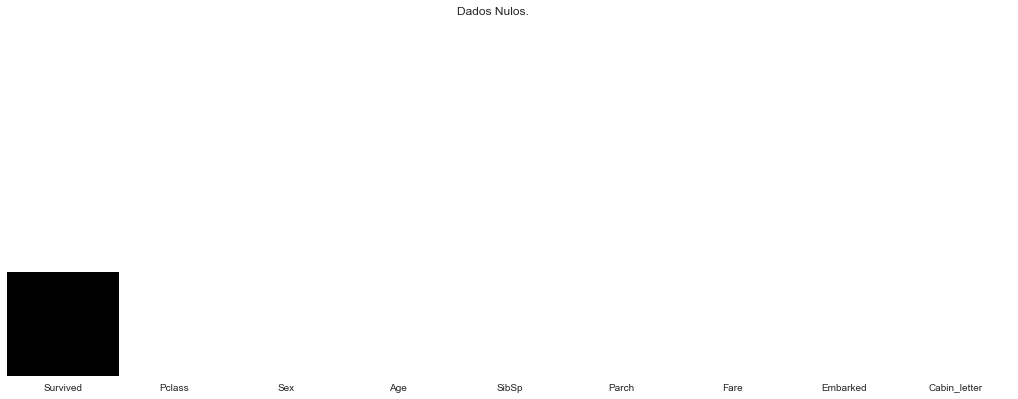

In [29]:
plt.figure(figsize=(18,6))
sns.set_style('darkgrid')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='binary')
plt.suptitle("Dados Nulos.") 

In [30]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True)
# Sex = 1 = male
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter
0,0.0,3,1,22.0,1,0,7.2500,S,
1,1.0,1,0,38.0,1,0,71.2833,C,C
2,1.0,3,0,26.0,0,0,7.9250,S,
3,1.0,1,0,35.0,1,0,53.1000,S,C
4,0.0,3,1,35.0,0,0,8.0500,S,


Restaurndo o train e o test

In [31]:
df_train = df.iloc[:891].copy()
df_test = df.iloc[891:].copy()

In [32]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter
0,0.0,3,1,22.000000,1,0,7.2500,S,
1,1.0,1,0,38.000000,1,0,71.2833,C,C
2,1.0,3,0,26.000000,0,0,7.9250,S,
3,1.0,1,0,35.000000,1,0,53.1000,S,C
4,0.0,3,1,35.000000,0,0,8.0500,S,
...,...,...,...,...,...,...,...,...,...
886,0.0,2,1,27.000000,0,0,13.0000,S,
887,1.0,1,0,19.000000,0,0,30.0000,S,B
888,0.0,3,0,24.816367,1,2,23.4500,S,
889,1.0,1,1,26.000000,0,0,30.0000,C,C


In [33]:
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter
0,NaN,3,1,34.500000,0,0,7.8292,Q,
1,NaN,3,0,47.000000,1,0,7.0000,S,
2,NaN,2,1,62.000000,0,0,9.6875,Q,
3,NaN,3,1,27.000000,0,0,8.6625,S,
4,NaN,3,0,22.000000,1,1,12.2875,S,
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,24.816367,0,0,8.0500,S,
414,NaN,1,0,39.000000,0,0,108.9000,C,C
415,NaN,3,1,38.500000,0,0,7.2500,S,
416,NaN,3,1,24.816367,0,0,8.0500,S,


In [34]:
df_train.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Cabin_letter    0
dtype: int64

In [35]:
df_train.drop(columns=['Cabin_letter'], inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,S
1,1.0,1,0,38.0,1,0,71.2833,C
2,1.0,3,0,26.0,0,0,7.9250,S
3,1.0,1,0,35.0,1,0,53.1000,S
4,0.0,3,1,35.0,0,0,8.0500,S


In [43]:
df_train.drop(columns=['Embarked'], inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,1,22.0,1,0,7.2500
1,1.0,1,0,38.0,1,0,71.2833
2,1.0,3,0,26.0,0,0,7.9250
3,1.0,1,0,35.0,1,0,53.1000
4,0.0,3,1,35.0,0,0,8.0500


<AxesSubplot:xlabel='Survived', ylabel='count'>

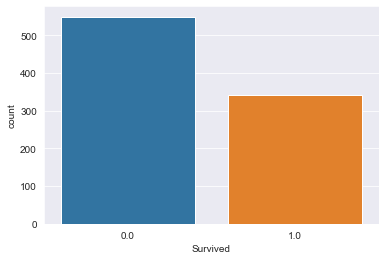

In [36]:
import seaborn as sns

sns.countplot(x = df['Survived'])

In [37]:
def AmostraEstratificada(dados, tamanho): 
    n1 = round(tamanho*dados['Survived'].mean())
    n0 = tamanho - n1

    zeros = dados[dados['Survived'] == 0]
    uns = dados[dados['Survived'] == 1] 

    am0 = zeros.sample(n0)
    am1 = uns.sample(n1)

    amostra = pd.concat([am0, am1])
    resto = dados.drop(amostra.index)

    return amostra, resto

In [38]:
validacao, treinamento = AmostraEstratificada(df_train, int((df_train.shape[0] * 0.3)//1) )

In [39]:
print(treinamento.shape)
print(treinamento['Survived'].mean())

print(validacao.shape)
print(validacao['Survived'].mean())

(624, 8)
0.38461538461538464
(267, 8)
0.38202247191011235


In [56]:
treinamento

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.000000,1,0,7.2500,S
1,1.0,1,0,38.000000,1,0,71.2833,C
4,0.0,3,1,35.000000,0,0,8.0500,S
5,0.0,3,1,24.816367,0,0,8.4583,Q
6,0.0,1,1,54.000000,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
884,0.0,3,1,25.000000,0,0,7.0500,S
885,0.0,3,0,39.000000,0,5,29.1250,Q
887,1.0,1,0,19.000000,0,0,30.0000,S
888,0.0,3,0,24.816367,1,2,23.4500,S


In [44]:
from pycaret.classification import setup, models, create_model, compare_models, tune_model, predict_model, plot_model, predict_model, evaluate_model, finalize_model, save_model

In [55]:
# Configuração da Modelagem automática feita pelo PyCaret
# Envolve os procedimentos de validação quanto de pré-processamento

modelagem = setup(data = treinamento,
                  target = 'Survived',
                  test_data = validacao,
                  fold_shuffle=True, 
                  session_id=2) 

,Description,Value
0,session_id,2
1,Target,Survived
2,Original Data,"(624, 8)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(624, 23)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [191]:
?setup

In [60]:
from pycaret.regression import *
exp_reg = setup(data = df, target = 'Survived',  fold_shuffle=True, session_id=2)


,Description,Value
0,session_id,2
1,Target,Survived
2,Original Data,"(1309, 9)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(629, 32)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [47]:
df[["Parch", "Pclass", "Survived"]].groupby(['Pclass'], as_index=False).count().sort_values(by='Pclass', ascending=True)

KeyError: 'Pclass'

tratamento dos dados  
Análise e interpretação dos resultados  
Comunicação dos aprendizados  
Tomada de decisão e implementação  